<center><h1>Making Merger Tree from m3p output</h1></center>

In [75]:
import numpy as np
import m3p_merger
import matplotlib.pyplot as plt
import importlib
import matplotlib
importlib.reload(m3p_merger)

<module 'm3p_merger' from 'C:\\Users\\David\\Google Drive\\Axion PhD\\PeakPatch\\m3p_merger\\m3p_merger.py'>

In [3]:
Omega_m0 = 0.3
Omega_r0 = 8.486e-5
h = 0.7

G = 6.674e-11 # m^3 kg^(-1) s^(-2)
Mpc = 3.086e22 # m 
Msol = 1.988e30 # kg
Mpcpkm = (1e3/3.0869e22)
H = 100*Mpcpkm*h # /s
Omega_DM = 0.267

rho_c = 3/(8*np.pi*G)*Mpc**3/Msol*H**2 # Msol / Mpc^(-3)
rho_bg = 0.267*rho_c

z_eq = Omega_m0/Omega_r0 - 1
a_eq = 1/(1+z_eq)


In [4]:
# Peak patch data
pathPrefix = "/usr/users/ellis/PeakPatch/m3p/axOut/"

In [76]:
#ppFile = pathPrefix+"../inputs/"+"inputs.ax_manyz"
ppFile = "inputs.axbig_manyz"
peak_list, boxsize = m3p_merger.MakePeakList(ppFile,startIndex = 25, printOutput = True)

	Loading file (75 of 75): axOut/axionfinal_halos_99.hdf5


In [67]:
peak_list.shape

(100,)

<h2><center>Find which trees are interesting</center></h2>

In [77]:
out = m3p_merger.BuildMergerTree(peak_list, ppFile, 
                redshift_indicies='all', final_halos_indicies=np.arange(100))

for i in range(len(out)):
    if len(out[i][25]) > 2:
        print(i, end = '* ')

C:\Users\David\Google Drive\Axion PhD\PeakPatch\m3p_merger\m3p_merger.py:269: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if final_halos_indicies == 'all':


12* 21* 33* 53* 54* 57* 82* 97* 98* 99* 

<h2><center>Calculate Merger Tree</center></h2>

In [78]:
importlib.reload(m3p_merger)
#indicies = np.arange(1000)
out = m3p_merger.BuildMergerTree(peak_list, ppFile, final_halos_indicies = 12)

<h2><center>Plot all peaks on each other</center></h2>

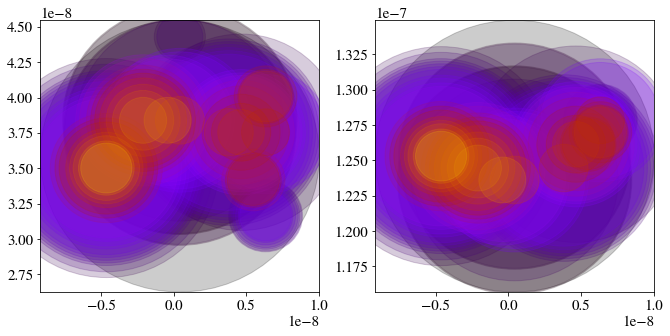

In [79]:
importlib.reload(m3p_merger)
#out = m3p_merger.BuildMergerTree(peak_list, ppFile, final_halos_indicies = 797, printOutput = True)
m3p_merger.plotMergerPatches(out[0], ppFile)

<h2><center>Plot merger tree</center></h2>

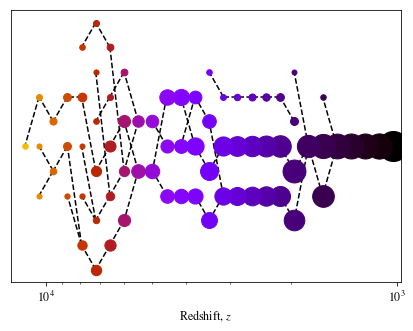

In [82]:
importlib.reload(m3p_merger)
#print(np.asarray(out[0][0]))

m3p_merger.plotMergerTree(out[0], ppFile,startIndex=25, font_size = 12, log = True)

<h3>Checking Linear Interpolation</h3>

1023.0 1000000.0
1023.0 1000000.0


(10000.0, 1023.0)

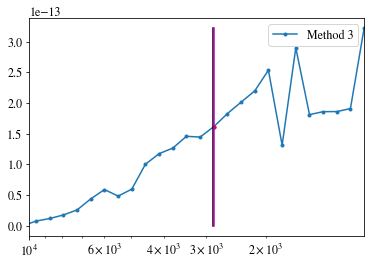

In [88]:
importlib.reload(m3p_merger)

halo_index = 12
f = 0.01

out = m3p_merger.BuildMergerTree(peak_list, ppFile, final_halos_indicies = halo_index)
zColLin, ProgMassLin, zLin = m3p_merger.FindCollapseRedshift(out[0], f, ppFile,startIndex = 25, interp = "Linear")
zCol, ProgMass, z = m3p_merger.FindCollapseRedshift(out[0], f, ppFile,startIndex = 25, interp = "None")
plt.semilogx(zLin, ProgMassLin, '-o', label = "Method 3", ms=3)
plt.semilogx(zLin[zLin == max(zLin[ProgMassLin>=ProgMassLin[0]/2])],
             ProgMassLin[zLin == max(zLin[ProgMassLin>=ProgMassLin[0]/2])], 'r.')

plt.semilogx([zColLin, zColLin], [0,ProgMassLin[0]],'k-')
plt.semilogx([zCol, zCol], [0,ProgMassLin[0]],'m-')

plt.semilogx([2e4, 1e4], [ProgMassLin[0]/2,ProgMassLin[0]/2],'g--')
plt.legend()
plt.xlim(1e4, z[0])
#plt.ylim(2e-11, 5e-11)

In [ ]:
importlib.reload(m3p_merger)
ppFile = "inputs.axbig_manyz"

startIndicies = [0, 25, 50, 74]

for i, startIndex in enumerate(startIndicies):  
    z0 = np.logspace(6,2,100)[startIndex]
    
    print("-"*40)
    print("Calculating collapse redshifts\n   ppFile: {}\n   z0={}\n".format(ppFile, z0))
    
    print("Building peak list...")
    peak_list, boxsize = m3p_merger.MakePeakList(ppFile, startIndex = startIndex, printOutput = True)
    print("Done.\n")

    print("Building merger trees...")
    out = m3p_merger.BuildMergerTree(peak_list, ppFile, final_halos_indicies = "all", printOutput = True)
    print("Done.\n")

    print("Calculating collapse redshifts...")
    collapse_redshifts = np.zeros(len(out))
    for i in range(len(out)):
        collapse_redshifts[i] = m3p_merger.FindCollapseRedshift(out[i], 0.01, ppFile, interp = "None")[0]
    print("Done.\n")

    print("Fetching final halo masses...")
    masses = np.zeros(len(out))
    for i in range(len(out)):
        masses[i] = out[i][0][0,4]
    print("Done.\n")

    print("Fetching final halo radii...")
    radii = np.zeros(len(out))
    for i in range(len(out)):
        radii[i] = out[i][0][0,3]
    print("Done.\n")

    print("Saving data...")
    np.save("ConcEvolution/axbig_manyz_CollapseRedshifts_f1em2_z0_{}".format(z0), collapse_redshifts)
    np.save("ConcEvolution/axbig_manyz_FinalMasses_f1em2_z0_{}".format(z0), masses)
    np.save("ConcEvolution/axbig_manyz_FinalRadii_f1em2_z0_{}".format(z0), radii)
    print("Done.\n")

----------------------------------------
Calculating collapse redshifts
   ppFile: inputs.axbig_manyz
   z0=1000000.0

Building peak list...
	Loading file (100 of 100): axOut/axionfinal_halos_99.hdf5
Done.

Building merger trees...
	Final redshift index 99 out of 100
	i.e. Earlist halo at z = 1000000.0
	Halo 1340 of 3111: 21 complete of 99

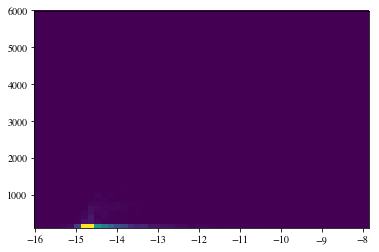

In [23]:
collapse_redshifts = np.load("axbig_manyz_CollapseRedshifts_f1em1.npy", allow_pickle = True)
masses = np.load("axbig_manyz_FinalMasses_f1em1.npy", allow_pickle = True)

plt.hist2d(np.log10(masses), collapse_redshifts,bins = 50);

In [11]:
np.mean(collapse_redshifts)

225.951462552234

In [22]:
zs = np.logspace(2, 6, 100)
print(np.where(zs==min(zs[zs>1000])))
print(np.where(zs==min(zs[zs>10000])))
print(np.where(zs==min(zs[zs>100000])))

(array([25], dtype=int64),)
(array([50], dtype=int64),)
(array([75], dtype=int64),)


In [11]:
zs[164]

505.26310653356796

In [30]:
print(zs[25], zs[50],zs[74])

1023.5310218990269 10476.157527896663 97700.99572992246
